# Data exploration &  pré-processing

In [11]:
import pandas as pd
patient = pd.read_pickle("../src/model/data/S2/S2.pkl")
s1_activity = pd.read_csv("../src/model/data/S2/S2_activity.csv")

In [ ]:
type(s1_df)
s1_keys = s1_df.keys()

L'id du sujet

In [7]:
s1_df['subject']

'S2'

Fréquence cardiaque grâce à l'électrocardiographie (ECG)

In [8]:
s1_df['rpeaks']

array([     33,     700,    1316, ..., 5742473, 5742909, 5743349],
      dtype=int32)

Contient toutes les données enregistrer par RespiBAN (torse) et Empatica E4 (poignet)

Chaque donnée est descrite dans le fichier info.txt de chaque dossier patient

In [9]:
s1_df['signal']

{'chest': {'ACC': array([[ 0.91139996,  0.03219998,  0.051     ],
         [ 0.91120005,  0.03240001,  0.04900002],
         [ 0.90900004,  0.03460002,  0.04579997],
         ...,
         [ 0.91659999,  0.02900004, -0.04180002],
         [ 0.91719997,  0.03120005, -0.04220003],
         [ 0.91620004,  0.03120005, -0.03920001]]),
  'ECG': array([[-0.02503967],
         [-0.02778625],
         [-0.03515625],
         ...,
         [ 0.06454468],
         [ 0.06646729],
         [ 0.07122803]]),
  'EMG': array([[-1.5],
         [-1.5],
         [-1.5],
         ...,
         [-1.5],
         [-1.5],
         [-1.5]]),
  'EDA': array([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
  'Temp': array([[-273.15],
         [-273.15],
         [-273.15],
         ...,
         [-273.15],
         [-273.15],
         [-273.15]], dtype=float32),
  'Resp': array([[-3.0380249 ],
         [-3.04412842],
         [-3.07006836],
         ...,
         [

Moyenne de la fréquence cardiaque

In [4]:
s1_df['label']

array([70.9229657 , 71.29105528, 68.69383264, ..., 95.13817648,
       96.7405001 , 96.84438537])

In [5]:
s1_df['activity']

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Information sur la personne

In [22]:
s1_df['questionnaire']

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [13]:
s1_activity

,# SUBJECT_ID,S2
0,# NO_ACTIVITY,0
1,# BASELINE,202
2,# NO_ACTIVITY,803
3,# STAIRS,980
4,# NO_ACTIVITY,1248
5,# SOCCER,1304
6,# NO_ACTIVITY,1609
7,# CYCLING,2013
8,# NO_ACTIVITY,2401
9,# DRIVING,2945


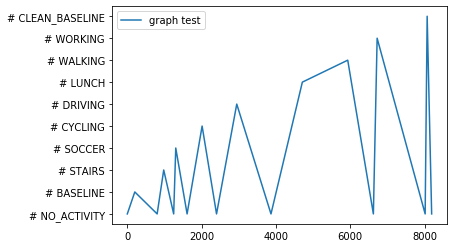

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(s1_activity[' S2'], s1_activity['# SUBJECT_ID'], label="graph test")
ax.legend()
plt.show()

In [7]:
for signal in s1_df['signal']['wrist']:
     print(signal)
    
print(s1_df['signal']['wrist']['BVP'].shape)
print(s1_activity[' S2'].shape)

ACC
BVP
EDA
TEMP
(525120, 1)
(18,)


Les signaux à analyser sont ACC (wrist & chest), ECG (chest), RESP (chest) ET BVP (wrist) 

In [10]:
s1_df['signal']['wrist']['ACC'][0]

array([-0.5625  ,  0.046875,  0.84375 ])

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


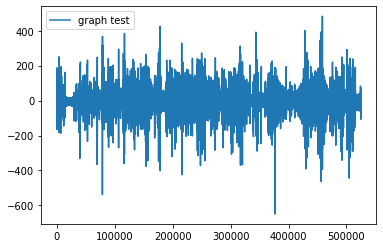

In [5]:
merge_bvp = [signal[0] for signal in s1_df['signal']['wrist']['BVP']]
fig, ax = plt.subplots()
ax.plot(merge_bvp, label="graph test")
ax.legend()
plt.show()

In [15]:
def heart_rate_feature(patient):
    # on multiplie par 8 car les signaux sont enregistré sur une fenêtre de 8 secondes
    diff = len(patient['activity']) - ( 8 * len(patient['label']))

    activity=[]
    for i in range(len(patient['activity'])-diff):
        activity.append(patient['activity'][i])


    heart_rate=[]
    for i in range(len(patient['label'])):
        for j in range(8):
            heart_rate.append(patient['label'][i])

                
    diff=len(activity)-(len(heart_rate))

    profil = list()
    for i in patient['questionnaire'].keys():
        profil.append(patient['questionnaire'][i])

    activity=pd.DataFrame(activity)
    heart_rate=pd.DataFrame(heart_rate)
    profil=pd.DataFrame.from_dict(patient['questionnaire'],orient='index')
    profil=profil.T

    # 0 pour homme, 1 pour femme
    if profil['Gender'].iloc[0] == 'm' : profil['Gender'] = 0 
    else : profil['Gender'] = 1  

    test=[]
    index=[]

    for i in range(len(activity)):
        test.append(profil.iloc[0])
        index.append(i)
    profil=pd.DataFrame(test)
    profil=profil.set_index([index])

    heart_rate_feature = heart_rate.join(profil)
    #heart_rate_feature=heart_rate_feature.join(activity)
    return (heart_rate_feature, activity)
    #return data['signal']


In [16]:
feat2, targ2=heart_rate_feature(patient)